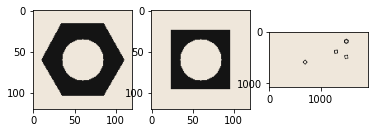

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt.subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

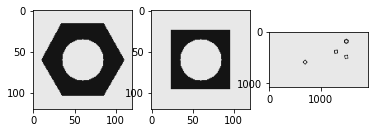

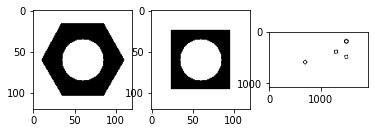

In [6]:
hex_gr = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
sq_gr = cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
con_gr = cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1,3)
ax[0].imshow(cv.cvtColor(hex_gr, cv.COLOR_GRAY2RGB))
ax[1].imshow(cv.cvtColor(sq_gr, cv.COLOR_GRAY2RGB))
ax[2].imshow(cv.cvtColor(con_gr, cv.COLOR_GRAY2RGB))
#plt.title("Grayscaled Converted images")
plt.show()

_ , hex_gr_ot = cv.threshold(hex_gr,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
_ , sq_gr_ot = cv.threshold(sq_gr,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
_ , con_gr_ot = cv.threshold(con_gr,0,255,cv.THRESH_OTSU+cv.THRESH_BINARY)

fig, ax = plt.subplots(1,3)
ax[0].imshow(cv.cvtColor(hex_gr_ot, cv.COLOR_GRAY2RGB))
ax[1].imshow(cv.cvtColor(sq_gr_ot, cv.COLOR_GRAY2RGB))
ax[2].imshow(cv.cvtColor(con_gr_ot, cv.COLOR_GRAY2RGB))
#plt.title("Grayscaled Converted images")
plt.show()
